# Face Recognition

### !!This is a basic notebook, completing which you can get (preliminarly) 5/10 ponints. Other tasks which will get you more ponts are described in a Telegram chat

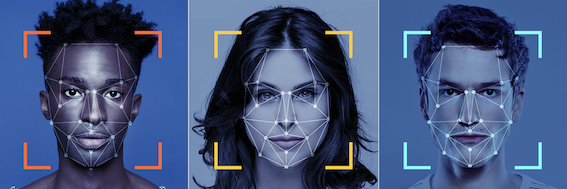

In this project you'll dive into face recognition framework and train neural network for face recognition task, play with losses and metrics.

We will train neural network on [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). 

As you see on the site, images of celebA dataset look like this:


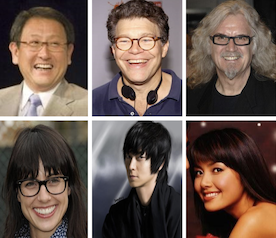

But we won't train a neural network for face recognition on those images. We'll need to preprocess them first. Let's see why we need it and how we need to preprocess them.

Let's look at how face recognition systems work:

## Face recognition model training and inference setup

This section describes how face recognition models are trained, what data alignment is and how the inference of face recognition model looks like. If you are familiar with this, you can skip this section.

### Model training

To train face recognition model on any facial dataset images must be aligned first. This step is very important to achieve a good quality of face recognition.

What is alignment: it consists of three steps:
1. Given image, identify facial landmarks on the image (coordinates of eyes, nose and mouth points). Separate neural network can be used there which was trained to identify landmarks on facial images. You can refer to [PyTorch Landmarks tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to see how this works.
2. Rotate all the images in the dataset so that eyes of the person on every image lie on a certain pre-defined horizontal line.
3. Scale all the images in the dataset so that the size of the faces are approximately identical.

Here's an example of what we would get after alignment of all the images of Aaron Peirsol from our dataset:

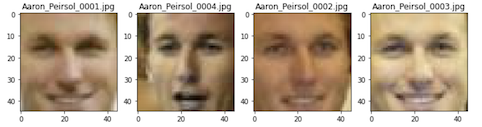

You see that eyes of all the faces lie on one horizontal line and all the faces have almost the same size. If we align all the images in the dataset, we can then train a neural network on aligned images.

**Why we need the alignment procedure**: the alignment of all faces in dataset makes the task of facial recognition easier for the model. If all the faces that model sees are of the same size and have their landmarks (eyes, nose, etc) on almost the same parts of the images, it is easier for the model to learn to identify a person on the image. The model diesn't need to "search" for the face and eyes positions on the image befire performing a recognition.

If you are interested, you can also train a model on non-aligned images, but you'll see that it would perform badly. It is possible though to train a model for face recognition without pre-alignment of all the faces, but this would require a huge amount of data — more that almost any company has. The only company that has openly presented its face recognition system that does not require special alignment is Facebook — their neural network was trained on a really huge amount of data using a special trick to avoid alignment. You can read more details [here](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Model inference

So let's see how the model trained on aligned faces can be used in real world:

Let's assume you owe a company and you want to build a face recognition system for your working office. You decided to hang some cameras around the office and want them to be able to recognize faces of all your employees when they are sitting / walking around the office (we let you decide by yourself why you would need such a system in your office)


A system for face recognition typically conststs of 3 stages:
- face detection
- face alignment
- face recognition

Let's discuss them in detail:

**Face detection**

When the camera is hanged on the wall it records a video and splits the video into single images, like this:

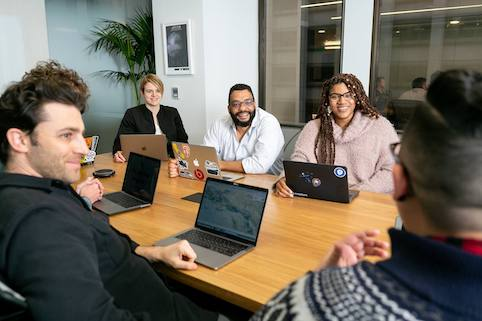

To be able to recognize all the faces on the photo you need first to detect all the faces that are present on the photo, like this:

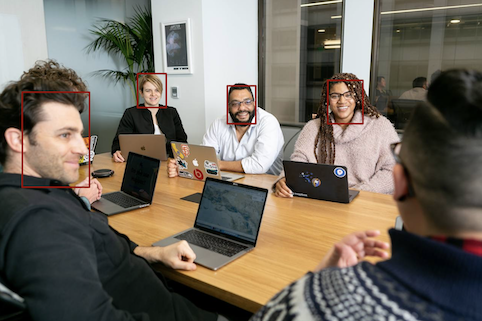

That is the first part — detection. You could use any neural network that can detect humans for this.

**Face alignment**

The second stage is to align all the faces found. The alignment procedure here should be the same as used to align training images.

So we'll get an image of a guy on a photo aligned like this:

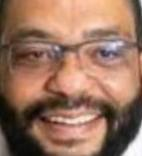

**Face recognition**

On the third stage we use the neural network that we trained to recognize a face.

So that's how the face recognition models pipeline work. You can also read about it more on [this link](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (and using internet search)

## Neural network model architecture 

Let's discuss how model for face recognition should look like.



The easiest and, actually, the most used way to build a neural network for face recognition is to build it as a **simple classifier**.

Assume we have a dataset with photos of N different people. Then we can build a neural network to classify all the images from the dataset into N classes. Each class refers to one unique person in the dataset.

**How do we recognize new people by this network then?** We actually want the network for face recognition to be able to recognize not only the people which are in training set, but almost every person in the world.

That is how: after training the model, we'll drop it's last classification layer. After that when we'll pass an image of the person through network, we'll get the output of the pre-last layer — it's **the embedding of the image**. Having embeddings of two different images we can compare them using **cosine distance**. The less the distance is — the higher the probability that those two photos belong to one person is. 

Using that technique we can get embeddings of every image — even of unseen people, compare them, and reveal images belonging to same people. 

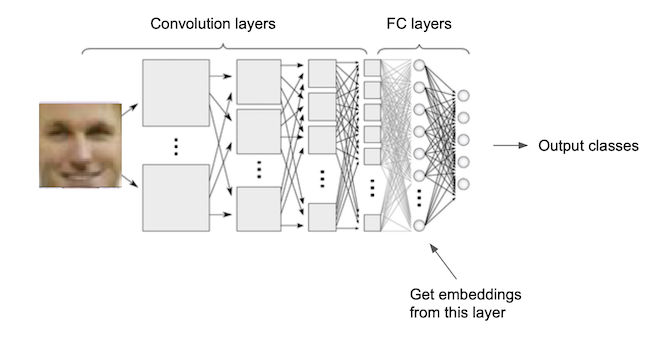

## Task 1 (30% points): build a neural network for faces classification as discribed above.

### Dataset 

We will train out face recognition network on part of the [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). We'll use a version of it that has all the images in it aligned. You can download the dataset using the links: 
- (whole celebA dataset) [dataset with 10177 classes](https://drive.google.com/file/d/1R-J71aJ50ahF-PkmaytLDyvbAiCccQdl/view?usp=sharing)
- [dataset with 1000 classes](https://drive.google.com/file/d/1JT9CMGjIbO7LtUuh8IYRc2OYrY0lGy5r/view?usp=sharing) 

**Important**: images in both datasets are aligned, but not cropped. To crop images, there're files with bboxes coordinates for each image in both datasets

In [1]:
import os
# !gdown --id 1JT9CMGjIbO7LtUuh8IYRc2OYrY0lGy5r&export=download&confirm=t&uuid=e1a45a87-2fcc-421a-9430-5f3dc28d85ce
# if "celebA_train_1k" not in os.listdir():
#   ! unzip celebA_train_1k.zip;

In [2]:
# !pip install albumentations opencv-python --upgrade

In [3]:
# # this link won't work for you, if you want to generate working link, 
# # visit https://askubuntu.com/questions/1188381/how-to-get-link-of-file-to-download-with-wget
# # or download the data and place it to folder manually
# # ! wget "https://s404man.storage.yandex.net/rdisk/e0e5e83a8ed50a2dfedfc6bbe1081de4949c81c87d5410c45c2cedb578851f6a/618475fd/aZ8Akc9CqtcaAMvg9MkExUmNfU9U_vPugtmtwAC7LCh7Ob4GqD-JrqJl2rsy_hxC-1lho6HNKGxRJzyaqhvCBg==?uid=316082386&filename=celebA_train_500.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=170342993&hid=8e5296bb80b8febc2b500d8fd890bbcf&media_type=compressed&tknv=v2&etag=1b0518cba143d479efa9e581d57ead35&rtoken=Ny3K3Z2QBMXq&force_default=yes&ycrid=na-9388316a3a9a2e64a8e248d7729518fe-downloader8f&ts=5cfff715bb940&s=ec587c110763937cfa598cc4f80ae49bcf87d3f82f3ad4c67cc053b2961d3a3b&pb=U2FsdGVkX1_M1VrRqOVGHQ-RDMSpA0_18Qqau6zdD_w8F5__FE9yGJWvrQlF_6i82qf1CSgs4iy4r74kLxZEQ9_ykd_KwAh7b5R393KQquE" -O celebA.zip
# ! unzip celebA_train_1k.zip;

Let's look at the data first:

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# !ls celebA_train_1k/

- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

In [1]:
import os
import cv2
import numpy as np
from PIL import Image

from skimage import io, transform

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output

device = 'cuda' if torch.cuda.is_available() else 'cpu'

import torchvision
import torch.nn.functional as F 
import torch.nn as nn

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
import copy

C:\Users\pqlet\github_projects\objectDetection_cr\env_yolov5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\pqlet\github_projects\objectDetection_cr\env_yolov5\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\pqlet\github_projects\objectDetection_cr\env_yolov5\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

In [3]:
IMAGE_FOLDER = "celebA_train_1k/celebA_imgs"

In [5]:
target_df = pd.read_csv("celebA_train_1k/celebA_anno_1k.txt", sep=" ", names=["image_id","target"])

In [6]:
split_df = pd.read_csv("celebA_train_1k/celebA_train_split.txt", sep=" ", names=["image_id","split"])
split_df.split.value_counts()

0    17038
1     3736
2     3174
Name: split, dtype: int64

In [7]:
target_df.shape

(23948, 2)

In [8]:
print("Number of classes:" , target_df.target.nunique())

Number of classes: 1000


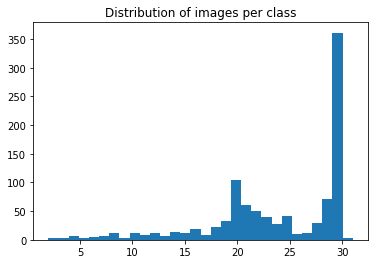

In [9]:
plt.hist(target_df.target.value_counts(), 
         bins=np.unique(target_df.target.value_counts().values).size
         )
plt.title("Distribution of images per class")
plt.show()

In [10]:
target_df.target.value_counts()

93     31
113    31
147    31
0      30
1      30
       ..
899     3
289     2
639     2
645     2
567     2
Name: target, Length: 1000, dtype: int64

In [11]:
del split_df

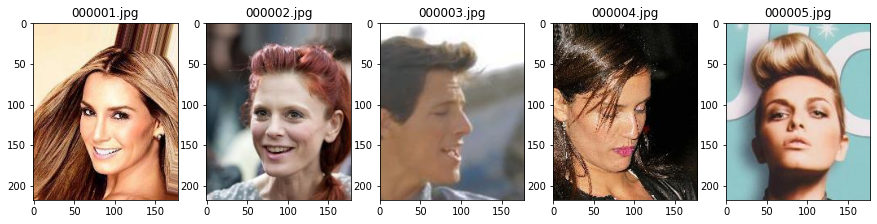

In [12]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]
show_imgs(images_names)


### Train Neural Network

In [14]:
# !pip install albumentations

In [15]:
from collections import defaultdict
import numpy as np
import albumentations as A
import os

In [16]:
def augmentDf(targets_df,  n_augm = 0, even_mode=False):
  """
  targets_df: pd.DataFrame with cols=['image_id', 'target']
  even_mode: 
      False - to just add new img_paths
      True - to even the number of images per class. If "even" is chosen n_augm is omitted
  """
  if (n_augm > 0) or (even_mode == True):
      assert isinstance(even_mode, bool), "even_mode argument is not bool type "
      total_aug_img_names = []
      max_imgs_per_class = targets_df.target.value_counts().max()
      for class_val in np.unique(targets_df['target'].values):
        class_image_names = targets_df[targets_df['target'] == class_val]['image_id'].values
        if even_mode:
            class_images_count = targets_df[targets_df.target == class_val].target.count()
            n_augm_class = n_augm + max_imgs_per_class - class_images_count
        else:
            n_augm_class = n_augm
        aug_image_names =  [[class_image_names[i], class_val] for i in np.random.choice(len(class_image_names), 
                                                                                            n_augm_class, 
                                                                                            replace=True
                                                                                            )
            ]
        total_aug_img_names.extend(aug_image_names)

      targets_df = targets_df.append(pd.DataFrame(total_aug_img_names, columns=targets_df.columns), ignore_index=True)
      return targets_df
  else:
      return targets_df

Let's build a Datasets and network using this images:

In [18]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    with open('celebA_train_1k/celebA_train_split.txt', 'r') as f:
      lines = f.readlines()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)

In [20]:
class celebADataset_mine(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, targets_df, transform, 
                 augm_even_mode=False, create_n_duplicates=0, aug=None, 
                 classes_to_use=None):
        self.transforms = transform
        self.aug = aug
        df_copy = copy.deepcopy(targets_df)
        
        
        if classes_to_use is not None:
            df_copy = df_copy.loc[df_copy.target.isin(classes_to_use)]
        
        img_paths_split = get_paths(dataset_type)
        target_ids_split = list(map(lambda x: x.split("/")[-1], img_paths_split))
        df_copy = df_copy.loc[(df_copy['image_id'].isin(target_ids_split))]
#         print("before augment\n" ,df_copy.target.value_counts())

        if (augm_even_mode != False) or (create_n_duplicates > 0) :
          df_copy = augmentDf(targets_df=df_copy, n_augm=create_n_duplicates, even_mode=augm_even_mode)
          print("after augment\n" ,df_copy.target.value_counts())
          print(df_copy.shape)

          self.targets = df_copy.target.values
          self.img_paths = np.array(list(map(lambda x: os.path.join(IMAGE_FOLDER, x), 
                                        df_copy['image_id'].values))
          )
        else:
          self.targets = df_copy["target"].values
          self.img_paths = np.array(list(map(lambda x: os.path.join(IMAGE_FOLDER, x), 
                                        df_copy['image_id'].values)))
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):      
      if torch.is_tensor(idx):
          idx = idx.tolist()
      sample = io.imread(self.img_paths[idx])
      target = self.targets[idx]

      if self.aug is not None:
        sample = self.aug(image=sample)['image']

      if self.transforms is not None:
        sample = self.transforms(sample)

        # Костыль пока не сделан align лиц
        # _, h, w = sample.shape
        # x_shift = int(w * 0)
        # y_shift = int(h * 0.2)
        # sample = transforms.functional.crop(sample, y_shift, x_shift, h-y_shift, w-x_shift )

      return sample, target

In [53]:
crop_size = [128,128]
resize_size = [224,224]

# Mean and STD for normalization
stats_for_norm = [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]

n_classes_to_use = 1000
classes_to_use = target_df.target.value_counts().index[:n_classes_to_use].tolist()

# For transforming tensors
common_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.CenterCrop(crop_size),
      transforms.Resize(resize_size),
      transforms.Normalize(*stats_for_norm)
])

common_p = 0.3
augment_transform = A.Compose([
    A.HorizontalFlip(p=common_p),
    A.RGBShift(p=common_p),
    A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=common_p),
    A.CLAHE(clip_limit=0.2, tile_grid_size=(4,4), always_apply=False, p=common_p),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=common_p),
    A.Equalize(mode="pil", p=common_p),
    A.GaussNoise(var_limit=(1.0, 5.0), mean=0, per_channel=True, always_apply=False, p=common_p),
    A.MotionBlur(blur_limit=(3,4), p=common_p),
    A.PixelDropout(dropout_prob=0.01, per_channel=False, drop_value=0, mask_drop_value=None, always_apply=False, p=common_p),
    A.ToSepia(always_apply=False, p=0.1),
    A.Cutout(num_holes=2, p=0.2),
    A.RandomShadow(shadow_roi=(0, 0, 1, 1), num_shadows_upper=1, shadow_dimension=4, p=0.3),
    # A.RandomSunFlare(flare_roi=(0,0,1,0.5), angle_lower=0, angle_upper=1, always_apply=False, p=0.5),
    A.Posterize(num_bits=4, always_apply=False, p=common_p),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=False, p=common_p),
    A.ToGray(p=0.01)
])

train_data = celebADataset('train', common_transforms)
val_data = celebADataset('val', common_transforms)
test_data = celebADataset('test', common_transforms)

train_data_mine = celebADataset_mine('train', target_df, common_transforms, 
                                     augm_even_mode=True, create_n_duplicates=40, aug=augment_transform,
                                     classes_to_use=classes_to_use
                                    )
# train_data_mine = celebADataset_mine('train', target_df, common_transforms, create_n_duplicates=0, aug=None)
val_data_mine = celebADataset_mine('val', target_df, common_transforms,
                                    classes_to_use=classes_to_use
                                    )
test_data_mine = celebADataset_mine('test', target_df, common_transforms,
                                    augm_even_mode=False, create_n_duplicates=0, aug=augment_transform,
                                    classes_to_use=classes_to_use
                                    )

# choose your own batch_size
BATCH_SIZE = 8

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_loader_mine = torch.utils.data.DataLoader(train_data_mine, batch_size=BATCH_SIZE, shuffle=True)
val_loader_mine = torch.utils.data.DataLoader(val_data_mine, batch_size=BATCH_SIZE, shuffle=False)
test_loader_mine = torch.utils.data.DataLoader(test_data_mine, batch_size=BATCH_SIZE, shuffle=False)


C:\Users\pqlet\github_projects\objectDetection_cr\env_yolov5\lib\site-packages\albumentations\augmentations\dropout\cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
C:\Users\pqlet\AppData\Local\Temp\ipykernel_14120\3094095378.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets_df = targets_df.append(pd.DataFrame(total_aug_img_names, columns=targets_df.columns), ignore_index=True)


after augment
 0      122
671    122
658    122
659    122
660    122
      ... 
338    122
339    122
340    122
341    122
999    122
Name: target, Length: 1000, dtype: int64
(122000, 2)


122000


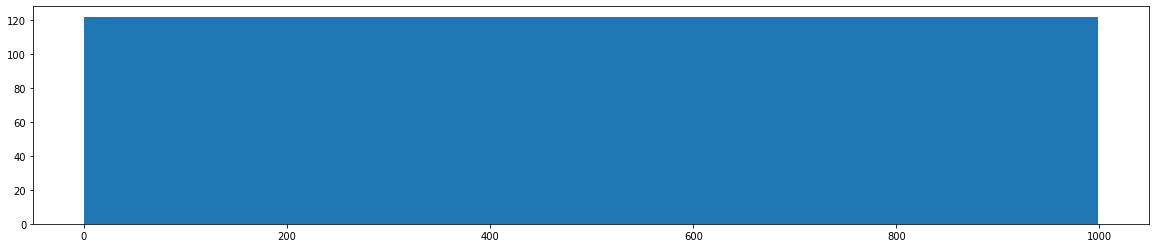

In [54]:
print(len(train_data_mine))
plt.figure(figsize=(20,4))
plt.hist(train_data_mine.targets, bins = 1000);
plt.show()

3736


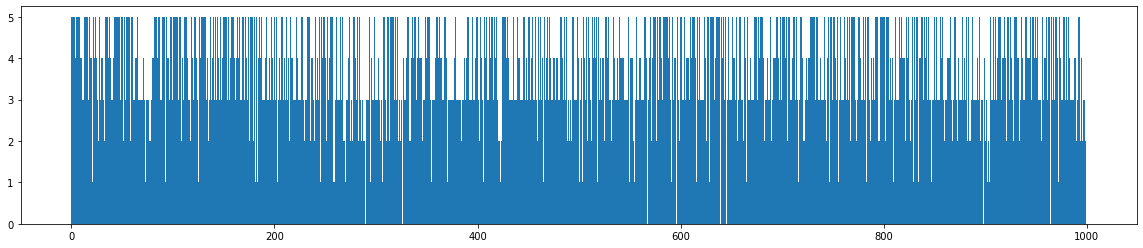

In [55]:
print(len(val_data_mine))
plt.figure(figsize=(20,4))
plt.hist(val_data_mine.targets, bins = 1000);
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


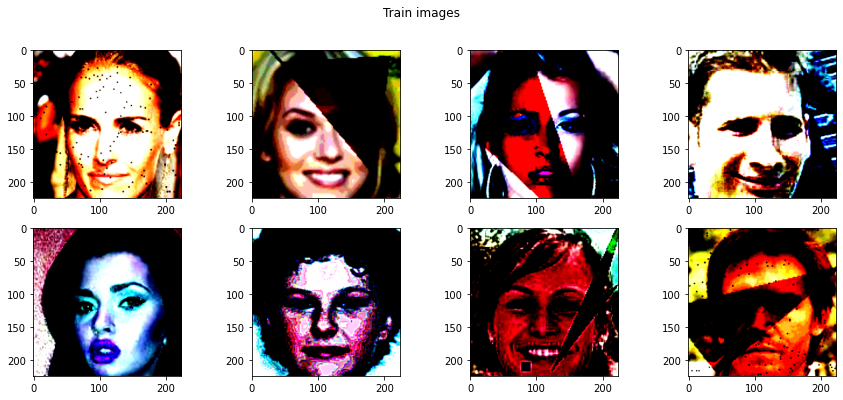

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


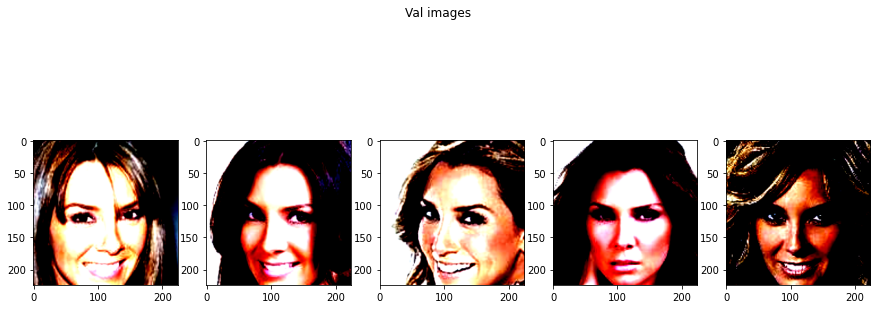

In [56]:
f, ax = plt.subplots(2,BATCH_SIZE//2)
f.set_size_inches(15,6)
# f.subplots_adjust(hspace=0.1, wspace=0.1)
plot_img = next(iter(train_loader_mine))
for i in range(ax.size):
    current_ax = np.ravel(ax)[i] 
    current_ax.imshow(plot_img[0][i].permute(1,2,0))
    # current_ax.axhline(y = new_shape[0]*0.55, color = 'r', linestyle = '-', linewidth=5)

f.suptitle("Train images")
plt.show()

f, ax = plt.subplots(1,5)
f.set_size_inches(15,6)
# f.subplots_adjust(hspace=0.1, wspace=0.1)
plot_img = next(iter(val_loader_mine))
for i in range(ax.size):
    current_ax = np.ravel(ax)[i] 
    current_ax.imshow(plot_img[0][i].permute(1,2,0))
    # current_ax.axhline(y = new_shape[0]*0.55, color = 'r', linestyle = '-', linewidth=5)
f.suptitle("Val images")
plt.show()

In [48]:
from tqdm.autonotebook import tqdm, trange
import time

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def train_new(model, optimizer, loss_fn, n_epochs, train_loader, valid_loader, scheduler=None):
  since = time.time()
  best_model_wts = model.state_dict()
  best_acc = 0.0

  losses = {'train': [], "val": []}
  metrics = {'train': [], "val": []}
  pbar = trange(n_epochs, desc="Epoch:")

  for epoch in pbar:

    #####################
    ####### Training
    #####################
    model.train()
    train_losses_epoch = []
    train_metrics_epoch = []
    for x_batch, y_real in tqdm(train_loader, leave=False, desc=f"{epoch} iter:"):
      # print("x_batch.shape")
      optimizer.zero_grad()
      y_model = model(x_batch.to(device))
      loss = loss_fn(y_model, y_real.to(device))
      loss.backward()
      optimizer.step()

      train_losses_epoch.append(loss.item())
      # print(y_real)
      # print(np.argmax(y_model.detach().cpu().numpy(),1))
      train_metrics_epoch.append(accuracy_score(y_real, 
                                               np.argmax(y_model.detach().cpu().numpy(),1)
                                                )
      )
    losses['train'].append(np.mean(train_losses_epoch))
    metrics['train'].append(np.mean(train_metrics_epoch))
    #####################
    ####### Validation
    #####################
    val_losses_epoch = []
    val_metrics_epoch = []
    model.eval()
    with torch.no_grad():
      for x_batch, y_real in valid_loader:
        y_model = model(x_batch.to(device))
        loss = loss_fn(y_model, y_real.to(device))
        val_losses_epoch.append(loss.item())
        val_metrics_epoch.append(accuracy_score(y_real, 
                                          np.argmax(y_model.detach().cpu().numpy(),1)
                                          ))
    epoch_loss_val = np.mean(val_losses_epoch)
    epoch_acc_val = np.mean(val_metrics_epoch)
    losses['val'].append(epoch_loss_val)
    metrics['val'].append(epoch_acc_val)

    if scheduler is not None:
        print("stepping with scheduler")
        scheduler.step()

    pbar.set_description('ValLoss: {:.4f} ValAcc: {:.4f}'.format(
                            epoch_loss_val, epoch_acc_val
                        ))

    # если достиглось лучшее качество, то запомним веса модели
    if epoch_acc_val > best_acc:
        best_acc = epoch_acc_val
        best_model_wts = model.state_dict()


    clear_output()

    print(f"Epoch {epoch+1}/{n_epochs}\nTrain Loss = {losses['train'][-1]}\nValidation Loss = {losses['val'][-1]}")
    print("Learning rate",get_lr(optimizer), scheduler.get_lr())

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(losses['train'], color='orange', label='train')
    ax1.plot(losses['val'], color='dodgerblue', label='val' )
    ax1.set_title(f"Loss (best train={round(np.min(losses['train']),6)}, best val={round(np.min(losses['val']),6)})")
    ax1.legend(prop={"size":12})
    ax1.grid()

    ax2.plot(metrics['train'], color='orange', label='train')
    ax2.plot(metrics['val'], color='dodgerblue', label='val' )
    ax2.set_title(f"Accuracy (best train={round(np.max(metrics['train']),6)}, best val={round(np.max(metrics['val']),6)})")
    ax2.legend(prop={"size":12})
    ax2.grid()

    plt.show()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(
      time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc))

  model.load_state_dict(best_model_wts)
  return model

Epoch 25/25
Train Loss = 0.6151875868439675
Validation Loss = 1.129751967266202
Learning rate 5e-06 [5e-06]


C:\Users\pqlet\github_projects\objectDetection_cr\env_yolov5\lib\site-packages\torch\optim\lr_scheduler.py:416: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


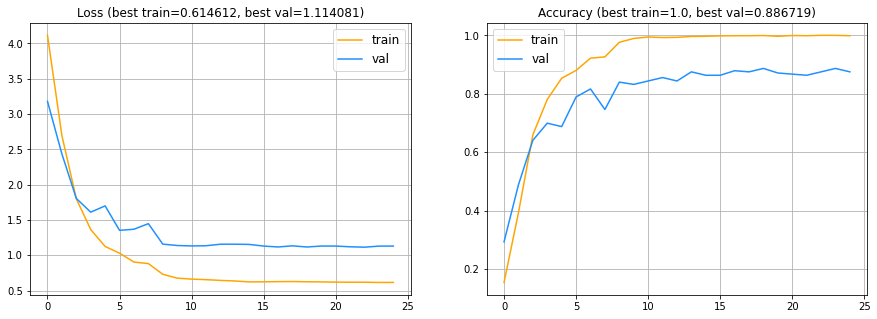

ValLoss: 1.1298 ValAcc: 0.8750: 100%|██████████████████████████████████████████████████| 25/25 [25:32<00:00, 61.30s/it]

Training complete in 25m 32s
Best val Acc: 0.886719


In [40]:
tqdm = partial(tqdm, position=0, leave=True)

model = torchvision.models.densenet201(pretrained=True)
model.classifier.out_features = n_classes_to_use
model.to(device)
model.requires_grad_(requires_grad=True);

# Loss initialization
loss_1 = nn.CrossEntropyLoss(reduction="mean", label_smoothing=0.05)

# LR = 0.01
# optim = torch.optim.SGD(model.parameters(), lr = LR, momentum = 0.9, weight_decay=1e-3)

LR = 5e-4
N_EPOCHS = 25
optim = torch.optim.AdamW(model.parameters(), lr = LR, weight_decay=7e-5)

# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max = N_EPOCHS)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[8, 15], gamma=0.1)


model = train_new(model=model, 
          optimizer=optim, 
          loss_fn=loss_1, 
          n_epochs=N_EPOCHS, 
          train_loader=train_loader_mine, 
          valid_loader=val_loader_mine,
          scheduler=scheduler
)


In [41]:
# torch.save(model.state_dict(), "saved_models/densenet201tv_224x224.pth")